In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genre'], encoding='unicode-escape')
ratings = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating','Timestamp'], encoding='unicode-escape')
users = pd.read_csv('users.dat', sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='unicode-escape')

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [110]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,MovieID,Title,Genre,genre,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,,,,,,,,...,,,,,,,,,,
1,2,Jumanji (1995),Adventure|Children's|Fantasy,,,,,,,,...,,,,,,,,,,
2,3,Grumpier Old Men (1995),Comedy|Romance,,,,,,,,...,,,,,,,,,,
3,4,Waiting to Exhale (1995),Comedy|Drama,,,,,,,,...,,,,,,,,,,
4,5,Father of the Bride Part II (1995),Comedy,,,,,,,,...,,,,,,,,,,


In [6]:
ratings_df = pd.DataFrame(ratings)
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users_df = pd.DataFrame(users)
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Exploratory Data Analysis

In [8]:
# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
temp_df = pd.merge(movies_df, ratings_df, on='MovieID')
master_df = pd.merge(temp_df, users, on='UserID')
master_data = master_df.reindex(columns = ['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating'])
master_data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
1,48,Pocahontas (1995),1,1,F,10,5
2,150,Apollo 13 (1995),1,1,F,10,5
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,527,Schindler's List (1993),1,1,F,10,5
...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),5727,25,M,4,4
1000205,3535,American Psycho (2000),5727,25,M,4,2
1000206,3536,Keeping the Faith (2000),5727,25,M,4,5
1000207,3555,U-571 (2000),5727,25,M,4,3


User Age Distribution

In [48]:
# Explore the datasets using visual representations (graphs or tables)
# User Age Distribution
x = master_data['Age'].value_counts()
x = x.to_frame(name = 'Num in Group')
x = x.reset_index()
age_distribution = x.rename(columns = {'index': 'Age Group'}).sort_values(by='Age Group')
age_distribution

,Age Group,Num in Group
6,1,27211
2,18,183536
0,25,395556
1,35,199003
3,45,83633
4,50,72490
5,56,38780


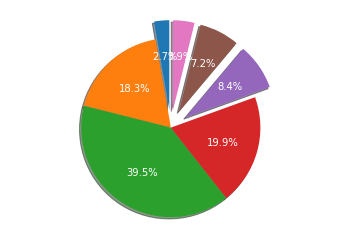

In [58]:
# pie chart for age distribution
labels = age_distribution['Age Group']
wedges = age_distribution['Num in Group']
explode = (0.2, 0, 0, 0, 0.2, 0.2, 0.2)  

fig1, ax1 = plt.subplots()
patches, texts, pcts = ax1.pie(wedges, explode = explode, labels=labels, textprops={'color': 'white'}, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.show()



User Rating of Toy Story

In [61]:
# Explore the datasets using visual representations (graphs or tables)
# User rating of the movie “Toy Story”
toy_story = master_data.loc[master_data['Title'] == 'Toy Story (1995)']
toy_story

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1,1,F,10,5
53,1,Toy Story (1995),6,50,F,9,4
124,1,Toy Story (1995),8,25,M,12,4
263,1,Toy Story (1995),9,25,M,17,5
369,1,Toy Story (1995),10,35,F,1,5
...,...,...,...,...,...,...,...
575166,1,Toy Story (1995),6022,25,M,17,5
575214,1,Toy Story (1995),6025,25,F,1,5
575485,1,Toy Story (1995),6032,45,M,7,4
575589,1,Toy Story (1995),6035,25,F,1,4


Top 25 Movies

In [75]:
# Explore the datasets using visual representations (graphs or tables)
# Top 25 movies by viewership rating
top25 = master_data[['MovieID', 'Title', 'Rating']].sort_values(by='Rating', ascending=False).set_index('MovieID').head(25)
top25

,Title,Rating
MovieID,,
1,Toy Story (1995),5
2858,American Beauty (1999),5
2599,Election (1999),5
2571,"Matrix, The (1999)",5
2551,Dead Ringers (1988),5
2395,Rushmore (1998),5
2391,"Simple Plan, A (1998)",5
2330,Hands on a Hard Body (1996),5
2321,Pleasantville (1998),5


Movie Ratings for Movies Rated by UserID 2696

In [65]:
# Explore the datasets using visual representations (graphs or tables)
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
user2696 = master_data.loc[master_data['UserID'] == 2696]
user2696

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
991035,350,"Client, The (1994)",2696,25,M,7,3
991036,800,Lone Star (1996),2696,25,M,7,5
991037,1092,Basic Instinct (1992),2696,25,M,7,4
991038,1097,E.T. the Extra-Terrestrial (1982),2696,25,M,7,3
991039,1258,"Shining, The (1980)",2696,25,M,7,4
991040,1270,Back to the Future (1985),2696,25,M,7,2
991041,1589,Cop Land (1997),2696,25,M,7,3
991042,1617,L.A. Confidential (1997),2696,25,M,7,4
991043,1625,"Game, The (1997)",2696,25,M,7,4
991044,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2


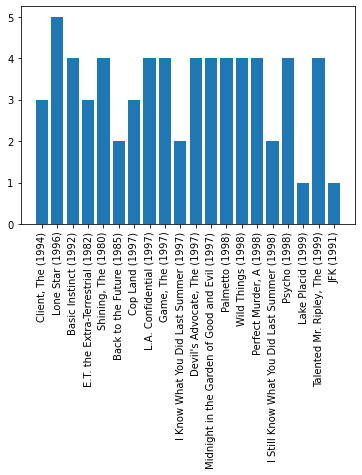

In [78]:
# user2696 bar chart
titles = np.array(user2696['Title'])
ratings = np.array(user2696['Rating'])
plt.bar(titles, ratings)
plt.xticks(rotation=90)
plt.title = 'user2696 Rated Movies'
plt.ylabel = 'Rating'
plt.xlabel = 'Movie Title'
plt.show()

In [120]:
# Feature Engineering:
# Use column genres:

# Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
genres = movies_df['Genre'].str.split('|', n=-1, expand=False)
genres

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: Genre, Length: 3883, dtype: object

In [124]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
genres_unformatted = genres.to_list()
genres_list = []
for genre in genres_unformatted:
    for g in genre:
        if g not in genres_list:
            genres_list.append(g)

for genre in genres_list:
    movies_df[genre] = ''
# movies_df = movies_df.drop(columns=['genre'])
movies_df['Split_Genres'] = genres
# print(genres)
new_movies_df = movies_df.reindex(columns=['MovieID', 'Title', 'Genre', 'Split_Genres', 'Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])

new_movies_df



,MovieID,Title,Genre,Split_Genres,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]",,,,,,,...,,,,,,,,,,
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",,,,,,,...,,,,,,,,,,
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",,,,,,,...,,,,,,,,,,
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]",,,,,,,...,,,,,,,,,,
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,[Comedy],,,,,,,...,,,,,,,,,,
3879,3949,Requiem for a Dream (2000),Drama,[Drama],,,,,,,...,,,,,,,,,,
3880,3950,Tigerland (2000),Drama,[Drama],,,,,,,...,,,,,,,,,,
3881,3951,Two Family House (2000),Drama,[Drama],,,,,,,...,,,,,,,,,,


In [143]:
genres_list

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

In [160]:
for index, row in new_movies_df.iterrows():
    for gen in genres_list:
        if gen in row['Split_Genres']:
            new_movies_df.at[index, gen] = 1
        else:
            new_movies_df.at[index, gen] = 0

new_movies_df
        

,MovieID,Title,Genre,Split_Genres,Animation,Children's,Comedy,Adventure,Fantasy,Romance,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]",0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,[Comedy],0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,[Drama],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,[Drama],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,[Drama],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Determine the features affecting the ratings of any particular movie.
# IV: age, genre, gender
# DV: movie ratings


In [ ]:
# test age vs rating


In [ ]:
# test gender vs rating

In [ ]:
# test genre vs rating

In [ ]:
# Develop an appropriate model to predict the movie ratings
